### Yandex.Afisha

#### Yandex.Afisha Russian-language service for selling tickets for entertainment events: theaters, concerts, movies, musicals, shows and other events.
We have:
* Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
* File with all orders for the period
* Marketing expenses statistics

We are going to study:
* How people use the product
* When they start to buy
* How much money each customer brings
* When they pay off

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

* Visits

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.columns = visits.columns.str.replace(' ','_').str.lower()

There are 359400 entries in the visits dataset, 5 columns. There are no missing values in the table. 

Let's convert the values from "start_ts", "end_ts" columns to the datetime format.

In [4]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

* Orders

In [5]:
orders = pd.read_csv('/datasets/orders_log_us.csv')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
orders.columns = orders.columns.str.replace(' ','_').str.lower()

There are 50415 entries in the orders dataset, 3 columns. There are no missing values in the table. 

Let's convert the values from "buy_ts" column to the datetime format.

In [7]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

* Costs

In [8]:
costs = pd.read_csv('/datasets/costs_us.csv')
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
costs['dt'] = pd.to_datetime(costs['dt'])

There are 2542 entries in the costs dataset, 3 columns. There are no missing values in the table. 

* Let's find out how many people use our product every day, week, and month.

First, we'll create separate columns for year, month, and week values.

In [10]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

Now, we'll find DAU, WAU, MAU.

In [11]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'})

print ("Average number of daily active users: ", int(dau.mean()))

Average number of daily active users:  907


Let's look at behavior of DAU over time.

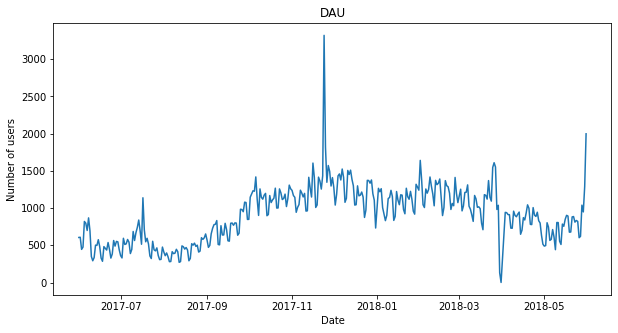

In [12]:
plt.figure(figsize=(10, 5))

plt.plot(dau)
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.title('DAU')
plt.show()

We can see one spike and one sharp decline in the graph. Let's find out when they occured.

In [13]:
dau.max()

uid    3319
dtype: int64

In [14]:
dau[dau['uid']==3319]

,uid
session_date,
2017-11-24,3319


Black Friday sales could be the reason for the spike.

What about the decline?

In [15]:
dau.min()

uid    1
dtype: int64

In [16]:
dau[dau['uid']==1]

,uid
session_date,
2018-03-31,1


Maybe there were technical problems with App.

In [17]:
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})

print ("Average number of weekly active users: ", int(wau.mean()))

Average number of weekly active users:  5716


In [18]:
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})

print ("Average number of monthly active users: ", int(mau.mean()))

Average number of monthly active users:  23228


Let's visualise MAU.

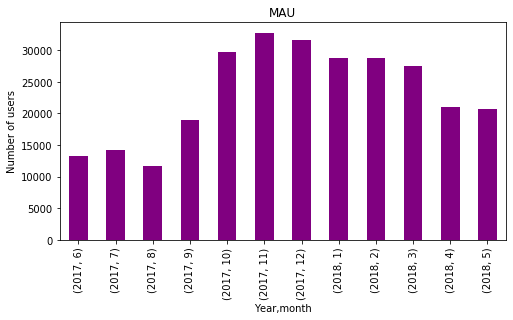

In [19]:
mau.plot.bar(figsize =(8,4), legend=False, color='purple')

plt.xlabel('Year,month')
plt.ylabel('Number of users')
plt.title('MAU')

plt.show()

We can see growth in MAU during September 2017 - November 2017 and slow decline during December 2018 - March 2018. We would say that November - March is a period of holidays in Russia, so more customers use the App. 

Let's check also sticky factor = DAU/WAU and DAU/MAU

In [20]:
dau_wau = dau.mean()/wau.mean()*100
dau_mau = dau.mean()/mau.mean()*100
print(int(dau_wau),"% of weekly users use our app on daily basis.")
print(int(dau_mau),"% of monthly users use our app on daily basis.")

15 % of weekly users use our app on daily basis.
3 % of monthly users use our app on daily basis.


The sticky factor (how loyal clients are) is low.

* How many sessions are there per day?

In [21]:
sessions_per_day = visits.groupby('session_date').agg({'uid': 'count'})
print("Average number of sessions per day: ", int((sessions_per_day).mean()))

Average number of sessions per day:  987


Let's also look at the number of sessions per user per month.

In [22]:
sessions_per_user_month = visits.groupby(['session_year', 'session_month']).agg({'uid': ['count','nunique']})
sessions_per_user_month.columns = ['num_of_sessions', 'num_of_users']
sessions_per_user_month['sessions_per_user'] = sessions_per_user_month['num_of_sessions'] / sessions_per_user_month['num_of_users']
print(sessions_per_user_month)         

                            num_of_sessions  num_of_users  sessions_per_user
session_year session_month                                                  
2017         6                        16505         13259           1.244815
             7                        17828         14183           1.256998
             8                        14355         11631           1.234202
             9                        23907         18975           1.259921
             10                       37903         29692           1.276539
             11                       43969         32797           1.340641
             12                       41983         31557           1.330386
2018         1                        36939         28716           1.286356
             2                        37182         28749           1.293332
             3                        35679         27473           1.298693
             4                        26515         21008           1.262138

In [23]:
display(sessions_per_user_month)

num_of_sessions  num_of_users  sessions_per_user
session_year session_month                                                  
2017         6                        16505         13259           1.244815
             7                        17828         14183           1.256998
             8                        14355         11631           1.234202
             9                        23907         18975           1.259921
             10                       37903         29692           1.276539
             11                       43969         32797           1.340641
             12                       41983         31557           1.330386
2018         1                        36939         28716           1.286356
             2                        37182         28749           1.293332
             3                        35679         27473           1.298693
             4                        26515         21008           1.262138
             5                        26635         20701           1.286653

In [24]:
sessions_per_user_month['sessions_per_user'].mean()

1.2808894945992668

On average, each user spends about 1 session in the app per month. Not so frequently.

It 'd be interesting to know what device dominates.

In [25]:
sessions_per_device = visits.groupby(['session_year', 'session_month', 'device']).agg({'uid':'count'})

In [26]:
sessions_per_device

uid
session_year session_month device        
2017         6             desktop  12358
                           touch     4147
             7             desktop  12950
                           touch     4878
             8             desktop  10854
                           touch     3501
             9             desktop  17356
                           touch     6551
             10            desktop  27392
                           touch    10511
             11            desktop  32917
                           touch    11052
             12            desktop  31112
                           touch    10871
2018         1             desktop  26577
                           touch    10362
             2             desktop  27077
                           touch    10105
             3             desktop  25861
                           touch     9818
             4             desktop  19231
                           touch     7284
             5             desktop  18882
                           touch     7753

In [27]:
sessions_per_device.unstack()['uid']

device                      desktop  touch
session_year session_month                
2017         6                12358   4147
             7                12950   4878
             8                10854   3501
             9                17356   6551
             10               27392  10511
             11               32917  11052
             12               31112  10871
2018         1                26577  10362
             2                27077  10105
             3                25861   9818
             4                19231   7284
             5                18882   7753

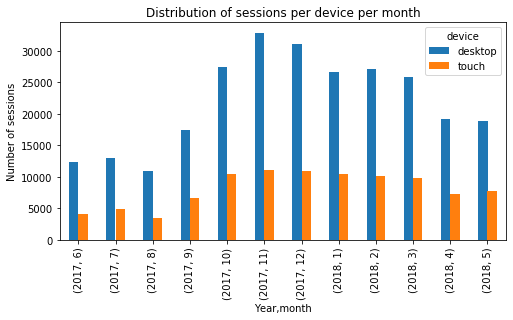

In [28]:
sessions_per_device.unstack()['uid'].plot.bar(figsize=(8,4))

plt.xlabel('Year,month')
plt.ylabel('Number of sessions')
plt.title('Distribution of sessions per device per month')

plt.show()

We can see that the desktop is a leader. Maybe it's more comfortable to order tickets on "big screen".

* Now let's find what is the length of each session.

In [29]:
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'session_year',
       'session_month', 'session_week', 'session_date'],
      dtype='object')

In [30]:
visits['session_length_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print("Average length of session in seconds: ",visits['session_length_sec'].mean())

Average length of session in seconds:  643.506488592098


Looks good, but let's have a look at the distribution

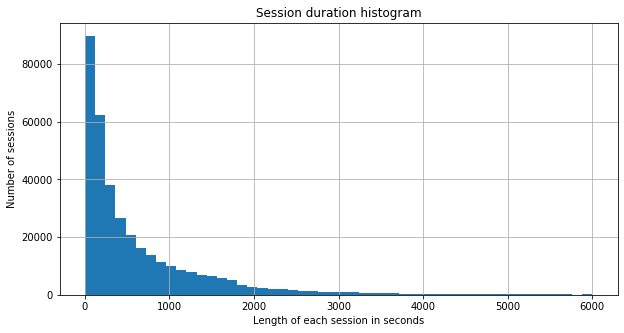

In [31]:
visits['session_length_sec'].hist(bins=50,range=(0,6000),figsize=(10,5))
plt.title('Session duration histogram')
plt.xlabel('Length of each session in seconds')
plt.ylabel('Number of sessions')
plt.show()

In our case in oder to find average session length (ASL) we need to use mode()

In [32]:
ASL = visits['session_length_sec'].mode()

So, our average session length is 60 seconds.

* Now let's find out how often do users come back

Let's find first visit date for each user and join it with table "visits"

In [33]:
first_visit_date = visits.groupby('uid')['start_ts'].min()
first_visit_date.name = 'first_visit_date'

visits = visits.join(first_visit_date,on='uid')

Let's find the cohort's lifetime.

In [34]:
# singling month from 'first_visit_date' and 'session_date' 
visits['first_visits_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visits_month'] = visits['session_date'].astype('datetime64[M]')

#number of months between 'visits_month' and 'first_visits_month'
visits['cohort_lifetime'] = visits['visits_month'] - visits['first_visits_month']
visits['cohort_lifetime']=visits['cohort_lifetime']/np.timedelta64(1,'M')
visits['cohort_lifetime']=visits['cohort_lifetime'].round().astype('int')


In [35]:
# creating DataFrame 'cohorts' 
cohorts = visits.groupby(['first_visits_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

# creating the initial_users_count DataFrame with the number of users in the 0th lifetime month
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visits_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

# merge two DatFrames cohorts and initial_users_count
cohorts = cohorts.merge(initial_users_count,on='first_visits_month') 


Now let's calculate retention rate

In [36]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [37]:
# let's leave only the year and month in the first_visits_month:
cohorts['first_visits_month'] = cohorts['first_visits_month'].dt.strftime('%Y-%m') 

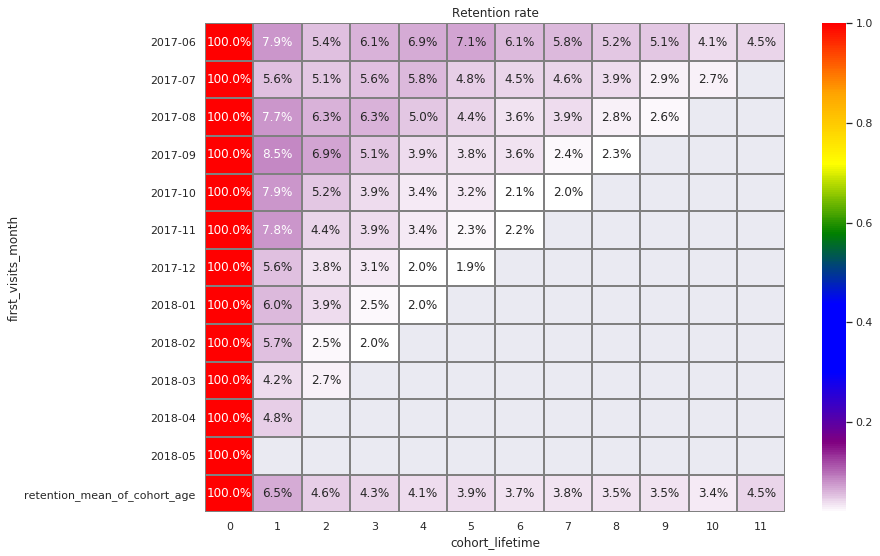

In [38]:
#creating pivot table and heatmap
retention_pivot = cohorts.pivot_table(index='first_visits_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

retention_pivot_mean_age = retention_pivot.mean(axis = 0)
retention_pivot_mean_age.name = 'retention_mean_of_cohort_age'
retention_pivot_=retention_pivot.append(retention_pivot_mean_age)


sns.set()
plt.figure(figsize=(13, 9))
plt.title('Retention rate')

cmap = mcolors.LinearSegmentedColormap.from_list(
    name='test',
    colors=['white','purple','blue','blue','green','yellow','orange','red'])

sns.heatmap(retention_pivot_ , annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap = cmap)

plt.show() 


Conclusions: 

Average number of daily active users:  907

Average number of weekly active users:  5716

Average number of monthly active users:  23228

We saw one sharp increasing in daily number of users (probably because of the Black Fraiday) and one sharp decline (probably because of the technical problems with App). We saw increasing in number of monthly active users during some periods of time September - November and slow decline during December - March. We would say that November - March is a period of holidays in Russia, so more customers use the App.

Average number of sessions per day:  987. Average session length is 60 seconds.

We saw that users prefer to use the app on the desktop than on the mobile.

We saw that the highest retention rate in September cohort (maybe there were some special offers). After that retention rate decreasing from cohort to cohort. June cohort also looks good, we can see increasing of retention rate inside the cohort. 

* When do people start buying

Let's find first purchase date for each user

In [39]:
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'

Now we'll join first visit and first order

In [40]:
first_visit_date = first_visit_date.reset_index()
first_order_date = first_order_date.reset_index()
first_visit_order = first_visit_date.merge(first_order_date, on ='uid', how = 'left') 

Let's check if we have users that accidentally their first visit wasn't tracked. This means that the date of their first order happened before the first visit.

In [41]:
first_visit_order[first_visit_order['first_order_date']<first_visit_order['first_visit_date']]

,uid,first_visit_date,first_order_date


We don't have such users.

In [42]:
first_visit_order.head()

,uid,first_visit_date,first_order_date
0,11863502262781,2018-03-01 17:27:00,NaT
1,49537067089222,2018-02-06 15:55:00,NaT
2,297729379853735,2017-06-07 18:47:00,NaT
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
4,325320750514679,2017-09-30 14:29:00,NaT


We can see that we have users that didn't make orders at all.

Let's find differance in days between first visit and first order.

In [43]:
first_visit_order['conversion'] = first_visit_order['first_order_date'] - first_visit_order['first_visit_date']
first_visit_order['conversion'] = first_visit_order['conversion']/np.timedelta64(1,'D')

We'll fill missing values with (-10). We choosed negative value in order to separate this values from others. 

In [44]:
first_visit_order['conversion'] = first_visit_order['conversion'].fillna(-10)

In [45]:
first_visit_order['conversion'] = first_visit_order['conversion'].round().astype('int')

In [46]:
first_visit_order.head()

,uid,first_visit_date,first_order_date,conversion
0,11863502262781,2018-03-01 17:27:00,NaT,-10
1,49537067089222,2018-02-06 15:55:00,NaT,-10
2,297729379853735,2017-06-07 18:47:00,NaT,-10
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,107
4,325320750514679,2017-09-30 14:29:00,NaT,-10


Let's look at distribution of difference between fisrt visit and first order in days.

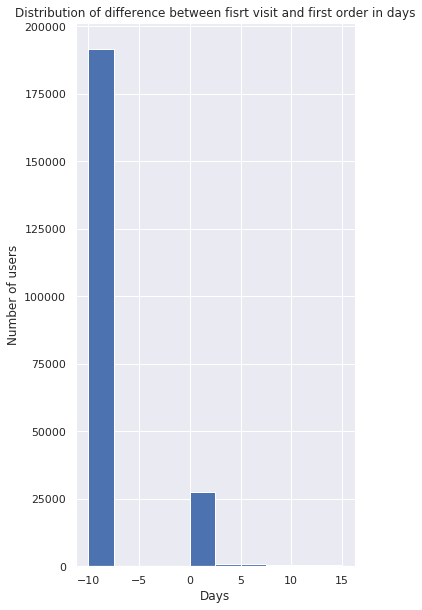

In [47]:
first_visit_order['conversion'].hist(bins=10,range=(-10,15),figsize=(5,10))
plt.title('Distribution of difference between fisrt visit and first order in days')
plt.xlabel('Days')
plt.ylabel('Number of users')
plt.show()

We can see a large group of users that had only one visit and then left. Let's exclude this group and look at users that did make orders.

In [48]:
first_visit_order_ = first_visit_order[first_visit_order['conversion']>=0].reset_index()

Let's look at distribution of difference between first visit and first order in minutes.

In [49]:
first_visit_order['conversion_minute'] = first_visit_order['first_order_date'] - first_visit_order['first_visit_date']
first_visit_order['conversion_minute'] = first_visit_order['conversion_minute']/np.timedelta64(1,'m')
first_visit_order['conversion_minute'] = first_visit_order['conversion_minute'].fillna(-10)
first_visit_order['conversion_minute'] = first_visit_order['conversion_minute'].round().astype('int')
first_visit_order__ = first_visit_order[first_visit_order['conversion_minute']>=0].reset_index()

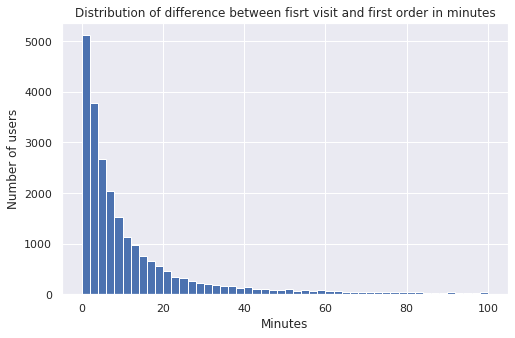

In [50]:
first_visit_order__['conversion_minute'].hist(bins = 50, range=(0,100), figsize=(8,5))
plt.title('Distribution of difference between fisrt visit and first order in minutes')
plt.xlabel('Minutes')
plt.ylabel('Number of users')
plt.show()

We can see that most users made their first purchase within 20 minutes on the same day of registration. 

Let's create a column with such categories: "Converted 0d" ( if registration and the first purchase occur on the same day), "Converted 1-3d" (onverted within 1-3 day) and so on.

In [51]:
def conversion_category(x):
    if x==0:
        return "Converted 0d"
    elif x>=1 and x<=3:
        return "Converted 1-3d"
    elif x>=4 and x<=7:
        return "Converted 4-7d"
    elif x>=8 and x<=14:
        return "Converted 8-14d"
    elif x>14:
        return "Converted after 14d"
    else:
        return "Not converted"
    

In [52]:
first_visit_order['conversion_type']= first_visit_order['conversion'].map(conversion_category)

In [53]:
first_visit_order.head()

,uid,first_visit_date,first_order_date,conversion,conversion_minute,conversion_type
0,11863502262781,2018-03-01 17:27:00,NaT,-10,-10,Not converted
1,49537067089222,2018-02-06 15:55:00,NaT,-10,-10,Not converted
2,297729379853735,2017-06-07 18:47:00,NaT,-10,-10,Not converted
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,107,154022,Converted after 14d
4,325320750514679,2017-09-30 14:29:00,NaT,-10,-10,Not converted


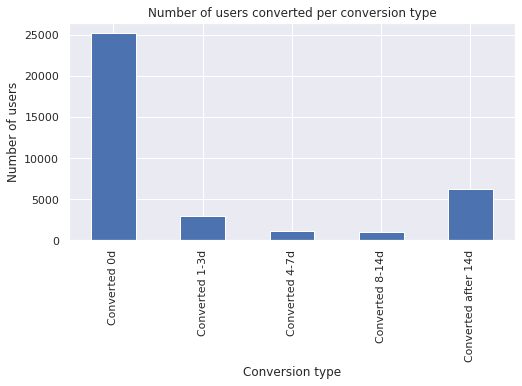

In [54]:
conv_type = first_visit_order[first_visit_order['conversion']>=0].groupby('conversion_type')['uid'].nunique()
conv_type.plot.bar(figsize =(8,4), legend=False)

plt.xlabel('Conversion type')
plt.ylabel('Number of users')
plt.title('Number of users converted per conversion type')

plt.show()

We see a high conversion of 0d (most users made purchases on the day of registration). This makes sense with online stores, usually people sign up with the intention to buy.

Let's check if users came from one source or they have several sources.

In [55]:
visits.groupby('uid').agg({'source_id':'nunique'}).sort_values(by = 'source_id',ascending = False).head()

,source_id
uid,
7060677486475916423,7
9019681082555518724,7
14481163132396345939,7
2445395077403109224,7
1242922364974949363,7


We can see that one user can have even 7 different sources. Let's take only his last source as his main source.

In [56]:
last_date = visits.groupby('uid').agg({'start_ts':'max'}).reset_index()

#we'll use subset to delete only duplicated user ids
source = pd.merge(visits[['uid','source_id']].drop_duplicates(subset=['uid']),last_date, on = 'uid')
source.head()


,uid,source_id,start_ts
0,16879256277535980062,4,2017-12-20 17:20:00
1,104060357244891740,2,2018-02-19 16:53:00
2,7459035603376831527,5,2017-07-01 01:54:00
3,16174680259334210214,9,2018-05-20 10:59:00
4,9969694820036681168,3,2017-12-27 14:06:00


Now we'll merge first_visit_order and source tables. 

In [57]:
source_merge = first_visit_order.merge(source[['uid','source_id']], on = 'uid')
source_merge.head()

,uid,first_visit_date,first_order_date,conversion,conversion_minute,conversion_type,source_id
0,11863502262781,2018-03-01 17:27:00,NaT,-10,-10,Not converted,3
1,49537067089222,2018-02-06 15:55:00,NaT,-10,-10,Not converted,2
2,297729379853735,2017-06-07 18:47:00,NaT,-10,-10,Not converted,3
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,107,154022,Converted after 14d,2
4,325320750514679,2017-09-30 14:29:00,NaT,-10,-10,Not converted,5


Let's have a look at sources and users that never make an order.

In [58]:
not_conv = source_merge[source_merge.conversion_type == 'Not converted'].groupby('source_id').agg({'uid': 'nunique'})
not_conv

,uid
source_id,
1,8003
2,15066
3,53536
4,62082
5,42045
6,3
7,32
9,5355
10,5524


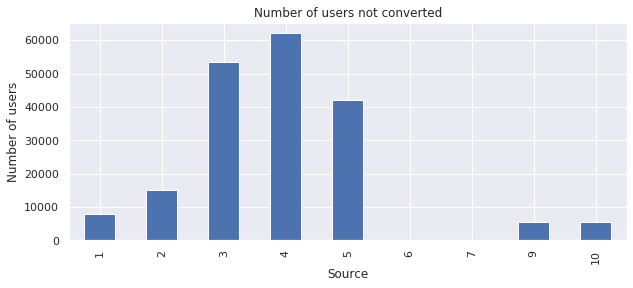

In [59]:
not_conv.plot.bar(figsize =(10,4), legend=False)

plt.xlabel('Source')
plt.ylabel('Number of users')
plt.title('Number of users not converted')

plt.show()

The most not converted users came from source 4.

Now will look at users that did make a purchase.

In [60]:
conversion_source = source_merge[source_merge['conversion'] >= 0]
conversion_source.head()

,uid,first_visit_date,first_order_date,conversion,conversion_minute,conversion_type,source_id
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,107,154022,Converted after 14d,2
22,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,0,Converted 0d,10
35,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0,79,Converted 0d,3
36,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1,1184,Converted 1-3d,5
38,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,0,Converted 0d,5


Let's find average conversion time by source.

In [61]:
conv_source = conversion_source.groupby('source_id')['conversion'].mean()
conv_source

source_id
1     14.690890
2     21.893130
3     16.204093
4     16.805762
5     13.313789
7      0.000000
9     32.407774
10    13.947623
Name: conversion, dtype: float64

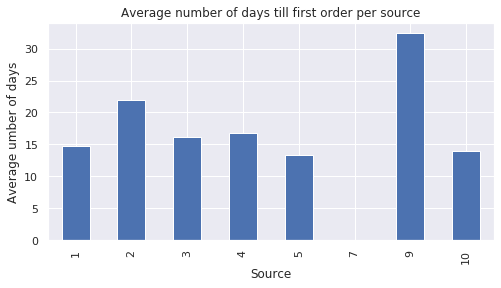

In [62]:
conv_source.plot.bar(figsize =(8,4), legend=False)

plt.xlabel('Source')
plt.ylabel('Average umber of days')
plt.title('Average number of days till first order per source')

plt.show()

We can see that users that come from source 5 on average convert faster.

* How many orders do they make during a given period of time?

Let's find how many orders per day

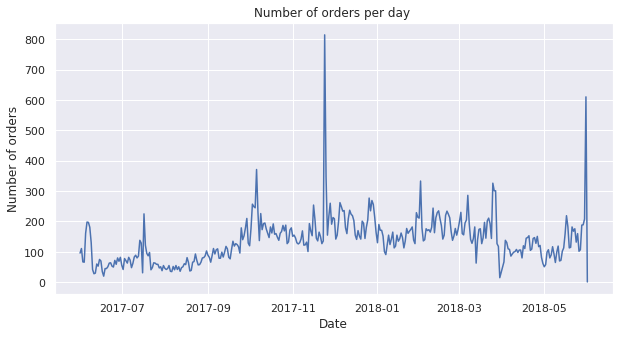

In [63]:
orders['buy_ts'] = orders['buy_ts'].dt.date
num_of_orders = orders.groupby('buy_ts')['uid'].count()

plt.figure(figsize=(10, 5))

plt.plot(num_of_orders)
plt.xlabel('Date')
plt.ylabel('Number of orders')
plt.title('Number of orders per day ')
plt.show()

We can see two spike at the end of November and at the end of May 

Now let's find average number of orders per first visits month.

In [64]:
#merge orders and visits
orders_per_cohort = orders.merge(visits[['uid','first_visits_month']], on = 'uid')

orders_per_cohort_= orders_per_cohort .groupby('first_visits_month').agg({'buy_ts': 'count', 'uid':'nunique'})
orders_per_cohort_.columns = ['n_orders','n_users']
orders_per_cohort_['avg_num_of_orders'] = orders_per_cohort_['n_orders']/orders_per_cohort_['n_users']
orders_per_cohort_


,n_orders,n_users,avg_num_of_orders
first_visits_month,,,
2017-06-01,447902,2923,153.233664
2017-07-01,23980,2458,9.755899
2017-08-01,50975,1721,29.619407
2017-09-01,32216,3058,10.534990
2017-10-01,26217,4678,5.604318
2017-11-01,58848,4262,13.807602
2017-12-01,29232,4074,7.175258
2018-01-01,24235,3119,7.770119
2018-02-01,19230,3186,6.035782


Plot bar graph for average number of orders per first visits month 

In [65]:
orders_per_cohort_= orders_per_cohort_['avg_num_of_orders'].reset_index()

orders_per_cohort_['first_visits_month'] = orders_per_cohort_['first_visits_month'].dt.strftime('%Y-%m')

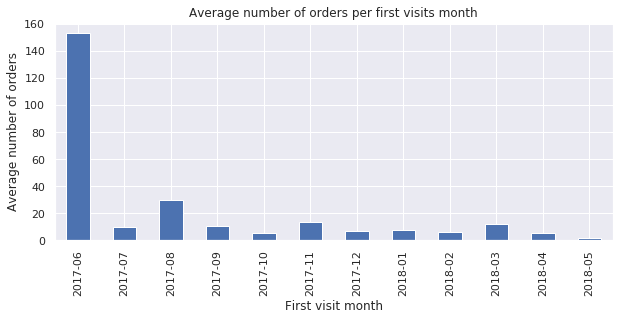

In [66]:
orders_per_cohort_.plot.bar(x='first_visits_month', y = 'avg_num_of_orders', figsize =(10,4), legend=False)

plt.xlabel('First visit month')
plt.ylabel('Average number of orders')
plt.title('Average number of orders per first visits month')

plt.show()

We can see that June is a leader in average number of orders.

* What is the average purchase size?

 We'll use orders_per_cohort table in order to find average purchase size per order by cohort

In [67]:
purch_size = orders_per_cohort.groupby('first_visits_month').agg({'revenue': 'sum', 'uid': 'count'})
purch_size.columns = ['revenue_sum','n_orders']
purch_size['avg_purchase_size'] = purch_size['revenue_sum']/purch_size['n_orders']
purch_size

,revenue_sum,n_orders,avg_purchase_size
first_visits_month,,,
2017-06-01,3.929833e+06,447902,8.773869
2017-07-01,1.686924e+05,23980,7.034711
2017-08-01,5.441894e+05,50975,10.675614
2017-09-01,1.229545e+06,32216,38.165662
2017-10-01,1.710361e+05,26217,6.523864
2017-11-01,2.471403e+05,58848,4.199639
2017-12-01,2.175067e+05,29232,7.440705
2018-01-01,1.341091e+05,24235,5.533696
2018-02-01,8.197011e+04,19230,4.262616


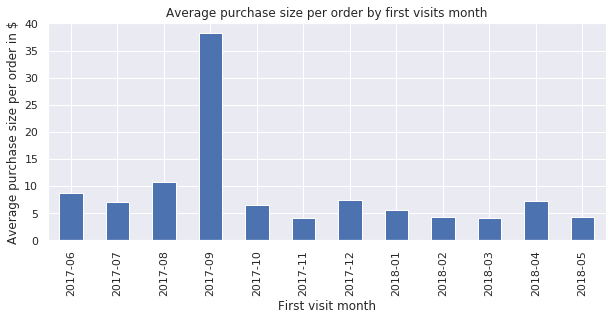

In [68]:
purch_size = purch_size['avg_purchase_size'].reset_index()

purch_size['first_visits_month'] = purch_size['first_visits_month'].dt.strftime('%Y-%m')

purch_size.plot.bar(x='first_visits_month', y = 'avg_purchase_size', figsize =(10,4), legend=False)

plt.xlabel('First visit month')
plt.ylabel('Average purchase size per order in $')
plt.title('Average purchase size per order by first visits month')

plt.show()

The highest value of average purchase size is in September. Maybe because of the opening of theater season after summer holidays

* How much money do they bring? (LTV)

In [69]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01,17.00,10329302124590727494
1,2017-06-01,0.55,11627257723692907447
2,2017-06-01,0.37,17903680561304213844
3,2017-06-01,0.55,16109239769442553005
4,2017-06-01,0.37,14200605875248379450


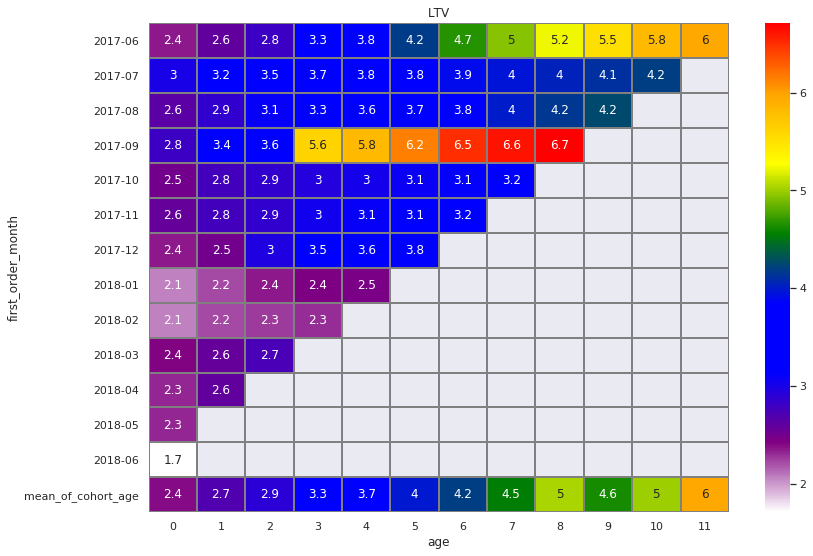

In [70]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

orders_ltv = pd.merge(orders,first_orders, on='uid')
cohorts_ltv = orders_ltv.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')

margin_rate = .5
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m') 

result = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round(2)

result_ = result.fillna('')

result_sum = result.cumsum(axis=1).round(2)
result_sum_mean = result_sum.mean(axis = 0)
result_sum_mean.name = 'mean_of_cohort_age'
result_sum_ = result_sum.append(result_sum_mean)

sns.set()
plt.figure(figsize=(13, 9))
plt.title('LTV')

sns.heatmap(result_sum_ , annot=True,  linewidths=1, linecolor='gray', cmap = cmap)

plt.show() 

We can see that the most money we got from September and June cohorts.

Now we'll look at Average LTV per source.

In [71]:
orders_ltv_ = orders_ltv.merge(visits[['uid', 'source_id']].drop_duplicates(subset=['uid']), on='uid', how = 'left')
orders_ltv_ = orders_ltv_.groupby('source_id').agg({'revenue': 'sum', 'uid': 'nunique'})
orders_ltv_.columns = ['revenue_sum','n_users']
orders_ltv_['ltv_av'] = orders_ltv_['revenue_sum']/orders_ltv_['n_users']
orders_ltv_.reset_index(inplace = True)
orders_ltv_

,source_id,revenue_sum,n_users,ltv_av
0,1,38560.06,3743,10.301913
1,2,65152.26,4323,15.071076
2,3,44317.68,9138,4.849823
3,4,52479.75,9823,5.342538
4,5,40357.91,6839,5.901142
5,7,1.22,1,1.220000
6,9,7076.98,1415,5.001399
7,10,4111.34,1241,3.312925


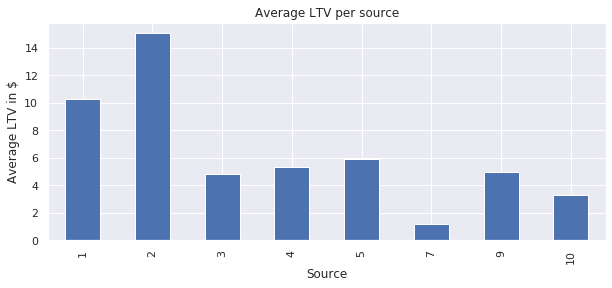

In [72]:
orders_ltv_.plot.bar(x='source_id', y = 'ltv_av', figsize =(10,4), legend=False)

plt.xlabel('Source')
plt.ylabel('Average LTV in $')
plt.title('Average LTV per source')

plt.show()

Looks like source 2 and 1 bring the most profitable clients.

Conclusions.

We have seen that about 80% of all users have never made a purchase. 

Most users made purchases on the day of registration. This makes sense with online stores, usually people sign up with the intention to buy.

The most number of users that never converted came from source 4. Users from source 5 on average convert faster. Sources 2 and 1 brought the most profitable clients.

The highest value of average purchase size was in September. Maybe because of the opening of theater season after summer holidays. However June was a leader in average number of orders. Both September and June cohorts brought us the most money.

* Marketing

* How much money was spent? 

In [73]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [74]:
spent = costs.groupby('source_id').agg({'costs': 'sum'})
spent

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


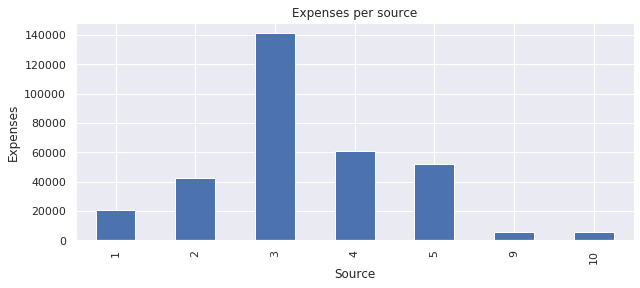

In [75]:
spent.plot.bar(figsize =(10,4), legend=False)

plt.xlabel('Source')
plt.ylabel('Expenses')
plt.title('Expenses per source')

plt.show()

The source 3 is the most expensive.

* How much did customer acquisition from each of the sources cost?

In [76]:
spent_per_source = spent.reset_index()
spent_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [77]:
cac_per_source = spent_per_source.merge(orders_ltv_[['source_id', 'n_users']], on='source_id', how = 'left')
cac_per_source

,source_id,costs,n_users
0,1,20833.27,3743
1,2,42806.04,4323
2,3,141321.63,9138
3,4,61073.60,9823
4,5,51757.10,6839
5,9,5517.49,1415
6,10,5822.49,1241


In [78]:
cac_per_source['cac'] = cac_per_source['costs']/cac_per_source['n_users']
cac_per_source

,source_id,costs,n_users,cac
0,1,20833.27,3743,5.565928
1,2,42806.04,4323,9.901929
2,3,141321.63,9138,15.465269
3,4,61073.60,9823,6.217408
4,5,51757.10,6839,7.567934
5,9,5517.49,1415,3.899286
6,10,5822.49,1241,4.691773


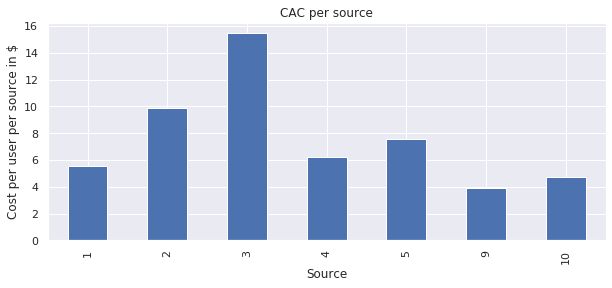

In [79]:
cac_per_source.plot.bar(x = 'source_id', y = 'cac', figsize =(10,4), legend=False)

plt.xlabel('Source')
plt.ylabel('Cost per user per source in $')
plt.title('CAC per source')

plt.show()

Source 3 has the most value of CAC.

* How worthwhile where the investments? (ROI)

Let's look at ROI per cohort

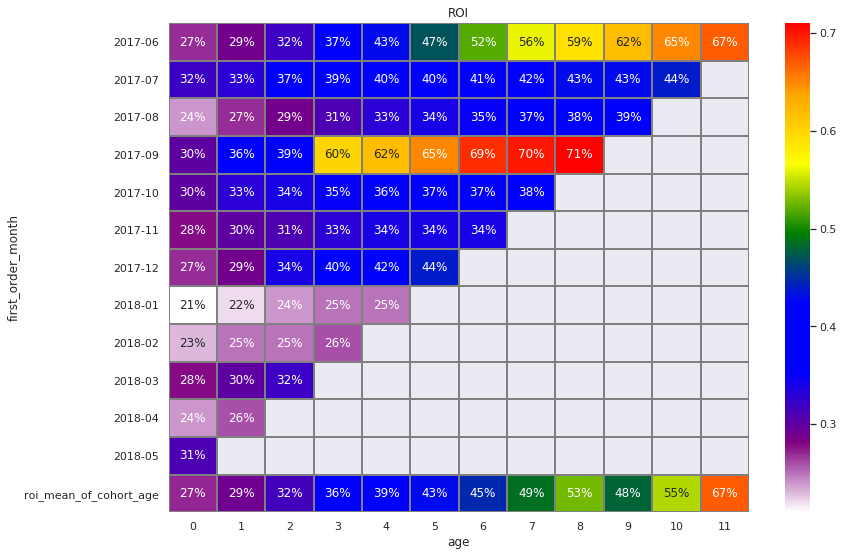

In [80]:
costs['dt_month'] = costs['dt'].astype('datetime64[M]')
report['first_order_month'] = report['first_order_month'].astype('datetime64[M]')
monthly_costs = costs.groupby('dt_month').agg({'costs': 'sum'})
report_ = pd.merge(report, monthly_costs, left_on = 'first_order_month', right_on = 'dt_month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_['romi'] = report_['ltv'] / report_['cac']

report_['first_order_month'] = report_['first_order_month'].dt.strftime('%Y-%m') 

output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output_ = output.fillna('')

output_sum = output.cumsum(axis=1).round(2)
output_sum_mean = output_sum.mean(axis = 0)
output_sum_mean.name = 'roi_mean_of_cohort_age'
output_sum_ = output_sum.append(output_sum_mean)

sns.set()
plt.figure(figsize=(13, 9))
plt.title('ROI')

sns.heatmap(output_sum_ , annot=True,  fmt='.0%', linewidths=1, linecolor='gray', cmap = cmap)

plt.show() 

There is no cohort that paid off.

Let's look at ROMI per source.

In [81]:
romi_merge = orders_ltv_[['source_id','ltv_av']].merge(cac_per_source[['source_id','cac']], on ='source_id')
romi_merge['romi'] = romi_merge['ltv_av']/romi_merge['cac'] 
romi_merge 

,source_id,ltv_av,cac,romi
0,1,10.301913,5.565928,1.850889
1,2,15.071076,9.901929,1.522034
2,3,4.849823,15.465269,0.313594
3,4,5.342538,6.217408,0.859287
4,5,5.901142,7.567934,0.779756
5,9,5.001399,3.899286,1.282645
6,10,3.312925,4.691773,0.706114


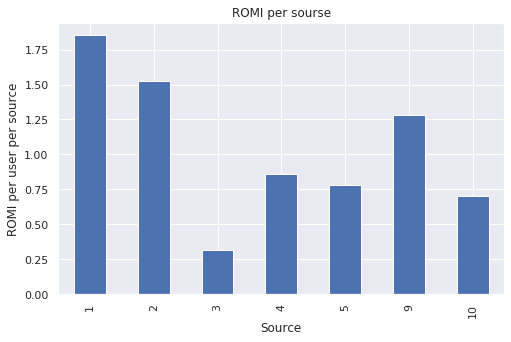

In [82]:
romi_merge.plot.bar(x = 'source_id', y = 'romi', figsize =(8,5), legend=False)

plt.xlabel('Source')
plt.ylabel('ROMI per user per source')
plt.title('ROMI per sourse')

plt.show()

We can see that the highest value of ROMI brings us source 1.

### Conclusion

Average number of daily active users:  907

Average number of weekly active users:  5716

Average number of monthly active users:  23228

We saw one sharp increasing in daily number of users (probably because of the Black Fraiday) and one sharp decline (probably because of the technical problems with App). We saw increasing in number of monthly active users during some periods of time September - November and slow decline during December - March. We would say that November - March is a period of holidays in Russia, so more customers use the App.

Average number of sessions per day:  987. Average session length is 60 seconds.

We saw that users prefer to use the app on the desktop than on the mobile.

The highest retention rate is in September cohort (maybe there were some special offers). After that retention rate is decreasing from cohort to cohort. June cohort also looks good, we can see increasing of retention rate inside the cohort. 

We have seen that about 80% of all users have never made a purchase.
Most users that placed at least one order did it on the day of registration. This makes sense with online stores, usually people sign up with the intention to buy.

The highest value of average purchase size was in September. Maybe because of the opening of theater season after summer holidays. However June was a leader in average number of orders. Both September and June cohorts brought us the most money.

We would recommend to choose source 1 since this source has the highest value of Return on Marketing Investment. Users from this source on average converted in 14 days. Sources 2 and 9 also looks good in terms of ROMI. We found out that sources 2 and 1 brought the most profitable clients. Source 3 is the most expensive and not profitable. The most number of users that never converted came from source 4. 
